In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [23]:
kyphosis = pd.read_csv("kyphosis.csv")
kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [39]:
# Extracting the independent variable
x= kyphosis.iloc[ :, [1,2,3]].values
# Extracting the dependent variable
y = kyphosis['Kyphosis'].values

# Data Analysis

In [40]:
kyphosis

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


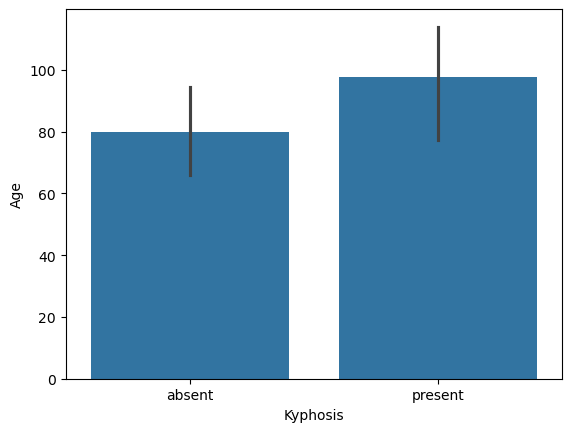

In [41]:
sns.barplot(x='Kyphosis', y= 'Age', data=kyphosis)
plt.show()

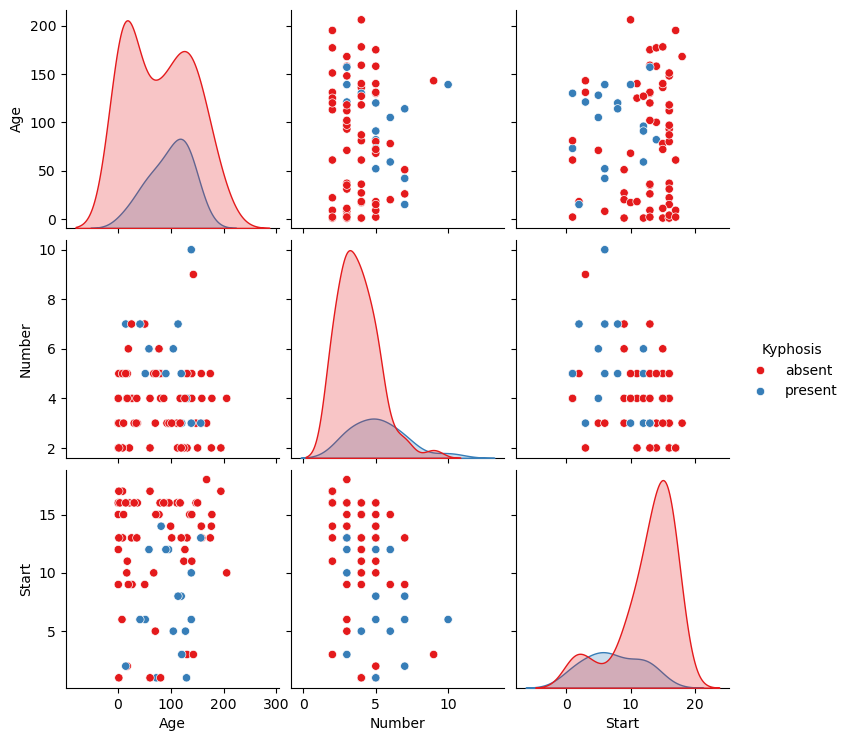

In [42]:
sns.pairplot(kyphosis, hue= 'Kyphosis', palette = 'Set1')
plt.show()

# Visualizing the dataset

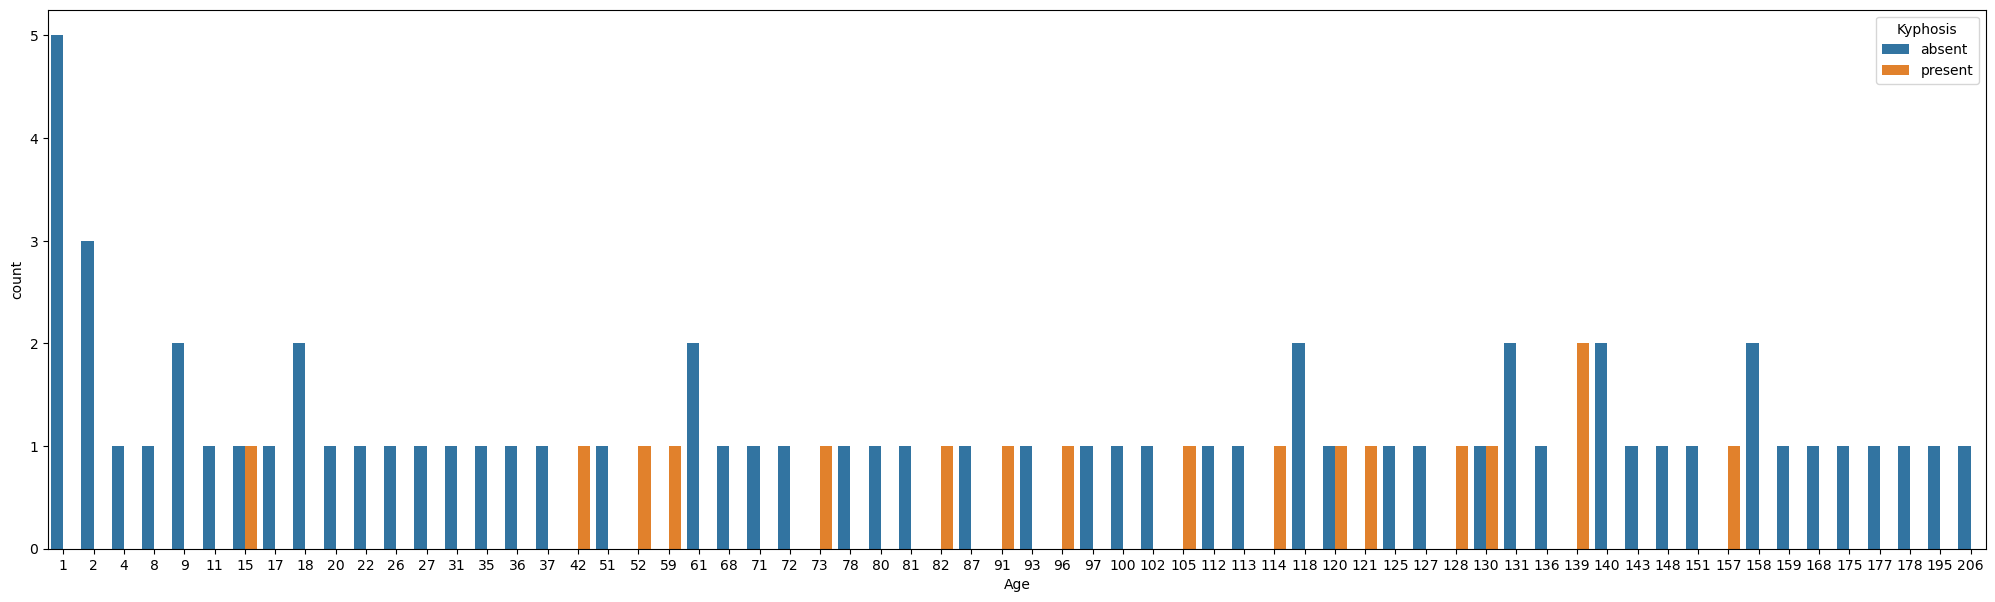

In [43]:
plt.figure(figsize= (25,7) )
sns.countplot(x= 'Age', hue= 'Kyphosis', data = kyphosis)
plt.show()

# Splitting the dataset into Training and Testing 

In [66]:
from sklearn.model_selection import train_test_split

# Extract features and target
x = kyphosis.iloc[:, [1, 2, 3]].values  # or use drop("Kyphosis", axis=1)
y = kyphosis['Kyphosis'].values        # ensure this is a 1D array

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

# Optional: Check shape consistency
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (56, 3)
y_train shape: (56,)


# Training a Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtree

DecisionTreeClassifier()

# Model Prediction

In [68]:
pred = dtree.predict(x_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'present', 'absent',
       'present'], dtype=object)

# Evaluating the model performance

In [72]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(pred, y_test))
print(confusion_matrix(pred, y_test))

              precision    recall  f1-score   support

      absent       0.73      0.89      0.80        18
     present       0.33      0.14      0.20         7

    accuracy                           0.68        25
   macro avg       0.53      0.52      0.50        25
weighted avg       0.62      0.68      0.63        25

[[16  2]
 [ 6  1]]


# RANDOM FOREST

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train , y_train)
rf

RandomForestClassifier()

In [86]:
pred = rf.predict(x_test)
pred

array(['absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present'], dtype=object)

In [87]:
print(classification_report(pred, y_test))
print(confusion_matrix(pred, y_test))

              precision    recall  f1-score   support

      absent       0.82      0.86      0.84        21
     present       0.00      0.00      0.00         4

    accuracy                           0.72        25
   macro avg       0.41      0.43      0.42        25
weighted avg       0.69      0.72      0.70        25

[[18  3]
 [ 4  0]]
